# Assignment
## Student Name

## Department  

## Course Name

## Lecturer Name


## January 23, 2024

In [1]:
#load libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats.mstats import winsorize


In [2]:
csv_files=['Australia.csv','Belgium.csv','ECB Data BG.csv','ECB Data Portal_Denmark.csv','government debt.csv']

In [3]:
# Create an empty DataFrame to store the merged data
merged_df = pd.DataFrame()

# Loop through each CSV file and append its data to the merged DataFrame
for csv_file in csv_files:
    df = pd.read_csv(csv_file)
    merged_df = merged_df.append(df, ignore_index=True)


/tmp/ipykernel_12752/2124465924.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  merged_df = merged_df.append(df, ignore_index=True)
/tmp/ipykernel_12752/2124465924.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  merged_df = merged_df.append(df, ignore_index=True)
/tmp/ipykernel_12752/2124465924.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  merged_df = merged_df.append(df, ignore_index=True)
/tmp/ipykernel_12752/2124465924.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  merged_df = merged_df.append(df, ignore_index=True)
/tmp/ipykernel_12752/2124465924.py:7: FutureWarning: The frame.append method is deprecated and will 

In [4]:
#load Excel data
EA_MPD_data=pd.read_excel('Dataset_EA-MPD.xlsx')
EA_MPD_data

,date,OIS_SW,OIS_1M,OIS_3M,OIS_6M,OIS_1Y,OIS_2Y,OIS_3Y,OIS_4Y,OIS_5Y,...,ES5Y,FR5Y,ES10Y,FR10Y,IT10Y,STOXX50,SX7E,EURUSD,EURGBP,EURJPY
0,1999-01-07,NaN,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,...,-0.500000,2.000000,0.150000,10.050000,NaN,-0.355885,-0.632078,-0.126630,-0.021234,-0.048187
1,1999-01-21,NaN,0.000000,0.000000,1.000000,0.000000,NaN,NaN,NaN,NaN,...,-0.900000,-0.500000,0.150000,-0.450000,NaN,-0.212126,-0.245174,0.064838,-0.085409,0.101767
2,1999-02-18,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,...,-0.900000,-0.200000,-0.100000,0.150000,NaN,0.174157,0.080538,0.022258,0.036386,0.040914
3,1999-03-04,0.000000,0.000000,1.000000,-0.500000,0.000000,NaN,NaN,NaN,NaN,...,-0.450000,-0.500000,-0.350000,-0.650000,NaN,0.274131,0.011735,0.069088,0.200022,0.230003
4,1999-03-18,0.500000,-0.500000,0.000000,-0.500000,1.000000,NaN,NaN,NaN,NaN,...,0.500000,0.400000,0.550000,0.750000,NaN,0.060922,0.094642,0.045430,0.029581,-0.015405
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,2023-05-04,-3.600001,-4.749990,-5.375004,-5.944991,-6.500006,-7.100010,-6.399989,-6.349993,-5.550003,...,-3.250003,-4.380012,-1.699996,-1.150012,-0.549984,0.374286,0.420925,-0.479741,-0.324389,-0.309488
295,2023-06-15,0.200009,0.139999,0.950003,3.020000,4.174995,3.769994,3.600001,3.750014,3.699994,...,4.449987,4.629993,3.450012,3.299999,5.100012,-0.202880,-0.201738,0.488732,0.355886,0.333221
296,2023-07-27,0.200009,-0.020003,-0.279999,-0.655007,-1.624990,-2.645016,-2.900004,-2.250004,-2.300000,...,-2.900004,-3.255010,-2.549982,-2.799988,-3.049994,0.189474,-0.590334,-0.463575,-0.180576,-0.269454
297,2023-09-14,5.900002,7.679987,6.150007,4.984999,2.975011,0.265002,-1.199985,-1.300001,-1.499987,...,-3.399992,-3.559995,-4.650021,-4.049993,-5.550003,0.426842,0.728404,-0.565434,-0.168747,-0.453278


In [5]:
# Define a dictionary mapping existing column names to new column names
column_name_mapping = {
    'DATE': 'date',
    'TIME PERIOD': 'Time_Period',
    ' Average nominal yields for total government debt securities with floating rates (GFS.M.N.AT.W0.S13.S1.N.L.LE.F3B.T._Z.RT._T.F.V.A1._T)': 'Austria_Yield',
    ' Average nominal yields for total government debt securities with floating rates (GFS.M.N.BE.W0.S13.S1.N.L.LE.F3B.T._Z.RT._T.F.V.A1._T)': 'Belgium_Yield',
    ' Average nominal yields for total government debt securities with floating rates (GFS.M.N.BG.W0.S13.S1.N.L.LE.F3B.T._Z.RT._T.F.V.A1._T)': 'Bulgaria_Yield',
    ' Average nominal yields for total government debt securities with floating rates (GFS.M.N.CY.W0.S13.S1.N.L.LE.F3B.T._Z.RT._T.F.V.A1._T)': 'Cyprus_Yield',
    ' Average nominal yields for total government debt securities with floating rates (GFS.M.N.CZ.W0.S13.S1.N.L.LE.F3B.T._Z.RT._T.F.V.A1._T)': 'Czech_Republic_Yield',
    ' Average nominal yields for total government debt securities with floating rates (GFS.M.N.DE.W0.S13.S1.N.L.LE.F3B.T._Z.RT._T.F.V.A1._T)': 'Germany_Yield',
    ' Average nominal yields for total government debt securities with floating rates (GFS.M.N.DK.W0.S13.S1.N.L.LE.F3B.T._Z.RT._T.F.V.A1._T)': 'Denmark_Yield',
    ' Average nominal yields for total government debt securities with floating rates (GFS.M.N.EE.W0.S13.S1.N.L.LE.F3B.T._Z.RT._T.F.V.A1._T)': 'Estonia_Yield',
    ' Average nominal yields for total government debt securities with floating rates (GFS.M.N.ES.W0.S13.S1.N.L.LE.F3B.T._Z.RT._T.F.V.A1._T)': 'Spain_Yield',
    ' Average nominal yields for total government debt securities with floating rates (GFS.M.N.FI.W0.S13.S1.N.L.LE.F3B.T._Z.RT._T.F.V.A1._T)': 'Finland_Yield',
    ' Average nominal yields for total government debt securities with floating rates (GFS.M.N.FR.W0.S13.S1.N.L.LE.F3B.T._Z.RT._T.F.V.A1._T)': 'France_Yield',
    ' Average nominal yields for total government debt securities with floating rates (GFS.M.N.GR.W0.S13.S1.N.L.LE.F3B.T._Z.RT._T.F.V.A1._T)': 'Greece_Yield',
    ' Average nominal yields for total government debt securities with floating rates (GFS.M.N.HR.W0.S13.S1.N.L.LE.F3B.T._Z.RT._T.F.V.A1._T)': 'Croatia_Yield',
    ' Average nominal yields for total government debt securities with floating rates (GFS.M.N.HU.W0.S13.S1.N.L.LE.F3B.T._Z.RT._T.F.V.A1._T)': 'Hungary_Yield',
    ' Average nominal yields for total government debt securities with floating rates (GFS.M.N.I8.W0.S13.S1.N.L.LE.F3B.T._Z.RT._T.F.V.A1._T)': 'Ireland_Yield',
    ' Average nominal yields for total government debt securities with floating rates (GFS.M.N.I9.W0.S13.S1.N.L.LE.F3B.T._Z.RT._T.F.V.A1._T)': 'Italy_Yield',
    ' Average nominal yields for total government debt securities (GFS.M.N.I9.W0.S13.S1.N.L.LE.F3.T._Z.RT._T.F.V.A1._T)': 'Italy_Total_Yield',
    ' Average nominal yields for total government debt securities with floating rates (GFS.M.N.IE.W0.S13.S1.N.L.LE.F3B.T._Z.RT._T.F.V.A1._T)': 'Ireland_Yield',
    ' Average nominal yields for total government debt securities with floating rates (GFS.M.N.IT.W0.S13.S1.N.L.LE.F3B.T._Z.RT._T.F.V.A1._T)': 'Italy_Yield',
    ' Average nominal yields for total government debt securities with floating rates (GFS.M.N.LT.W0.S13.S1.N.L.LE.F3B.T._Z.RT._T.F.V.A1._T)': 'Lithuania_Yield',
    ' Average nominal yields for total government debt securities with floating rates (GFS.M.N.LU.W0.S13.S1.N.L.LE.F3B.T._Z.RT._T.F.V.A1._T)': 'Luxembourg_Yield',
    ' Average nominal yields for total government debt securities with floating rates (GFS.M.N.LV.W0.S13.S1.N.L.LE.F3B.T._Z.RT._T.F.V.A1._T)': 'Latvia_Yield',
    ' Average nominal yields for total government debt securities with floating rates (GFS.M.N.MT.W0.S13.S1.N.L.LE.F3B.T._Z.RT._T.F.V.A1._T)': 'Malta_Yield',
    ' Average nominal yields for total government debt securities with floating rates (GFS.M.N.NL.W0.S13.S1.N.L.LE.F3B.T._Z.RT._T.F.V.A1._T)': 'Netherlands_Yield',
    ' Average nominal yields for total government debt securities with floating rates (GFS.M.N.PL.W0.S13.S1.N.L.LE.F3B.T._Z.RT._T.F.V.A1._T)': 'Poland_Yield',
    ' Average nominal yields for total government debt securities with floating rates (GFS.M.N.PT.W0.S13.S1.N.L.LE.F3B.T._Z.RT._T.F.V.A1._T)': 'Portugal_Yield',
    ' Average nominal yields for total government debt securities with floating rates (GFS.M.N.RO.W0.S13.S1.N.L.LE.F3B.T._Z.RT._T.F.V.A1._T)': 'Romania_Yield',
    ' Average nominal yields for total government debt securities with floating rates (GFS.M.N.SE.W0.S13.S1.N.L.LE.F3B.T._Z.RT._T.F.V.A1._T)': 'Sweden_Yield',
    ' Average nominal yields for total government debt securities with floating rates (GFS.M.N.SI.W0.S13.S1.N.L.LE.F3B.T._Z.RT._T.F.V.A1._T)': 'Slovenia_Yield',
    ' Average nominal yields for total government debt securities with floating rates (GFS.M.N.SK.W0.S13.S1.N.L.LE.F3B.T._Z.RT._T.F.V.A1._T)': 'Slovakia_Yield',
    ' Government debt (consolidated) (as % of GDP) (GFS.A.N.AT.W0.S13.S1.C.L.LE.GD.T._Z.XDC_R_B1GQ._T.F.V.N._T)': 'Austria_Debt_GDP',
    ' Government debt (consolidated) (as % of GDP) (GFS.A.N.B6.W0.S13.S1.C.L.LE.GD.T._Z.XDC_R_B1GQ._T.F.V.N._T)': 'Belgium_Debt_GDP',
    ' Government debt (consolidated) (as % of GDP) (GFS.A.N.BE.W0.S13.S1.C.L.LE.GD.T._Z.XDC_R_B1GQ._T.F.V.N._T)': 'Belgium_Debt_GDP',
    ' Government debt (consolidated) (as % of GDP) (GFS.A.N.BG.W0.S13.S1.C.L.LE.GD.T._Z.XDC_R_B1GQ._T.F.V.N._T)': 'Bulgaria_Debt_GDP',
    ' Government debt (consolidated) (as % of GDP) (GFS.A.N.CY.W0.S13.S1.C.L.LE.GD.T._Z.XDC_R_B1GQ._T.F.V.N._T)': 'Cyprus_Debt_GDP',
    ' Government debt (consolidated) (as % of GDP) (GFS.A.N.CZ.W0.S13.S1.C.L.LE.GD.T._Z.XDC_R_B1GQ._T.F.V.N._T)': 'Czech_Republic_Debt_GDP',
    ' Government debt (consolidated) (as % of GDP) (GFS.A.N.DE.W0.S13.S1.C.L.LE.GD.T._Z.XDC_R_B1GQ._T.F.V.N._T)': 'Germany_Debt_GDP',
    ' Government debt (consolidated) (as % of GDP) (GFS.A.N.DK.W0.S13.S1.C.L.LE.GD.T._Z.XDC_R_B1GQ._T.F.V.N._T)': 'Denmark_Debt_GDP',
    ' Government debt (consolidated) (as % of GDP) (GFS.A.N.EE.W0.S13.S1.C.L.LE.GD.T._Z.XDC_R_B1GQ._T.F.V.N._T)': 'Estonia_Debt_GDP',
     ' Government debt (consolidated) (as % of GDP) (GFS.A.N.ES.W0.S13.S1.C.L.LE.GD.T._Z.XDC_R_B1GQ._T.F.V.N._T)': 'Spain_Debt_GDP',
    ' Government debt (consolidated) (as % of GDP) (GFS.A.N.FI.W0.S13.S1.C.L.LE.GD.T._Z.XDC_R_B1GQ._T.F.V.N._T)': 'Finland_Debt_GDP',
    ' Government debt (consolidated) (as % of GDP) (GFS.A.N.FR.W0.S13.S1.C.L.LE.GD.T._Z.XDC_R_B1GQ._T.F.V.N._T)': 'France_Debt_GDP',
    ' Government debt (consolidated) (as % of GDP) (GFS.A.N.GB.W0.S13.S1.C.L.LE.GD.T._Z.XDC_R_B1GQ._T.F.V.N._T)': 'United_Kingdom_Debt_GDP',
    ' Government debt (consolidated) (as % of GDP) (GFS.A.N.GR.W0.S13.S1.C.L.LE.GD.T._Z.XDC_R_B1GQ._T.F.V.N._T)': 'Greece_Debt_GDP',
    ' Government debt (consolidated) (as % of GDP) (GFS.A.N.HR.W0.S13.S1.C.L.LE.GD.T._Z.XDC_R_B1GQ._T.F.V.N._T)': 'Croatia_Debt_GDP',
    ' Government debt (consolidated) (as % of GDP) (GFS.A.N.HU.W0.S13.S1.C.L.LE.GD.T._Z.XDC_R_B1GQ._T.F.V.N._T)': 'Hungary_Debt_GDP',
    ' Government debt (consolidated) (as % of GDP) (GFS.A.N.I8.W0.S13.S1.C.L.LE.GD.T._Z.XDC_R_B1GQ._T.F.V.N._T)': 'Ireland_Debt_GDP',
    ' Government debt (consolidated) (as % of GDP) (GFS.A.N.I9.W0.S13.S1.C.L.LE.GD.T._Z.XDC_R_B1GQ._T.F.V.N._T)': 'Italy_Debt_GDP',
    ' Government debt (consolidated) (as % of GDP) (GFS.A.N.IE.W0.S13.S1.C.L.LE.GD.T._Z.XDC_R_B1GQ._T.F.V.N._T)': 'Ireland_Debt_GDP',
    ' Government debt (consolidated) (as % of GDP) (GFS.A.N.IT.W0.S13.S1.C.L.LE.GD.T._Z.XDC_R_B1GQ._T.F.V.N._T)': 'Italy_Debt_GDP',
    'Government debt (consolidated) (as % of GDP) (GFS.A.N.JP.W0.S13.S1.C.L.LE.GD.T._Z.XDC_R_B1GQ._T.F.V.N._T)': 'Japan_Debt_GDP',
    ' Government debt (consolidated) (as % of GDP) (GFS.A.N.LT.W0.S13.S1.C.L.LE.GD.T._Z.XDC_R_B1GQ._T.F.V.N._T)': 'Lithuania_Debt_GDP',
    ' Government debt (consolidated) (as % of GDP) (GFS.A.N.LU.W0.S13.S1.C.L.LE.GD.T._Z.XDC_R_B1GQ._T.F.V.N._T)': 'Luxembourg_Debt_GDP',
    ' Government debt (consolidated) (as % of GDP) (GFS.A.N.LV.W0.S13.S1.C.L.LE.GD.T._Z.XDC_R_B1GQ._T.F.V.N._T)': 'Latvia_Debt_GDP',
 ' Government debt (consolidated) (as % of GDP) (GFS.A.N.MT.W0.S13.S1.C.L.LE.GD.T._Z.XDC_R_B1GQ._T.F.V.N._T)': 'Government Debt_MT',
    ' Government debt (consolidated) (as % of GDP) (GFS.A.N.NL.W0.S13.S1.C.L.LE.GD.T._Z.XDC_R_B1GQ._T.F.V.N._T)': 'Government Debt_NL',
    ' Government debt (consolidated) (as % of GDP) (GFS.A.N.PL.W0.S13.S1.C.L.LE.GD.T._Z.XDC_R_B1GQ._T.F.V.N._T)': 'Government Debt_PL',
    ' Government debt (consolidated) (as % of GDP) (GFS.A.N.PT.W0.S13.S1.C.L.LE.GD.T._Z.XDC_R_B1GQ._T.F.V.N._T)': 'Government Debt_PT',
    ' Government debt (consolidated) (as % of GDP) (GFS.A.N.RO.W0.S13.S1.C.L.LE.GD.T._Z.XDC_R_B1GQ._T.F.V.N._T)': 'Government Debt_RO',
    ' Government debt (consolidated) (as % of GDP) (GFS.A.N.SE.W0.S13.S1.C.L.LE.GD.T._Z.XDC_R_B1GQ._T.F.V.N._T)': 'Government Debt_SE',
    ' Government debt (consolidated) (as % of GDP) (GFS.A.N.SI.W0.S13.S1.C.L.LE.GD.T._Z.XDC_R_B1GQ._T.F.V.N._T)': 'Government Debt_SI',
    ' Government debt (consolidated) (as % of GDP) (GFS.A.N.SK.W0.S13.S1.C.L.LE.GD.T._Z.XDC_R_B1GQ._T.F.V.N._T)': 'Government Debt_SK',
    'Government debt (consolidated) (as % of GDP) (GFS.A.N.US.W0.S13.S1.C.L.LE.GD.T._Z.XDC_R_B1GQ._T.F.V.N._T)': 'Government Debt_US',

}



In [6]:
# Rename columns using the mapping
merged_df.rename(columns=column_name_mapping, inplace=True)
# Print the updated column names
print(merged_df.columns)


Index(['date', 'Time_Period', 'Austria_Yield', 'Belgium_Yield',
       'Bulgaria_Yield', 'Cyprus_Yield', 'Czech_Republic_Yield',
       'Germany_Yield', 'Denmark_Yield', 'Estonia_Yield', 'Spain_Yield',
       'Finland_Yield', 'France_Yield', 'Greece_Yield', 'Croatia_Yield',
       'Hungary_Yield', 'Ireland_Yield', 'Italy_Yield', 'Italy_Total_Yield',
       'Ireland_Yield', 'Italy_Yield', 'Lithuania_Yield', 'Luxembourg_Yield',
       'Latvia_Yield', 'Malta_Yield', 'Netherlands_Yield', 'Poland_Yield',
       'Portugal_Yield', 'Romania_Yield', 'Sweden_Yield', 'Slovenia_Yield',
       'Slovakia_Yield', 'Austria_Debt_GDP', 'Belgium_Debt_GDP',
       'Belgium_Debt_GDP', 'Bulgaria_Debt_GDP', 'Cyprus_Debt_GDP',
       'Czech_Republic_Debt_GDP', 'Germany_Debt_GDP', 'Denmark_Debt_GDP',
       'Estonia_Debt_GDP', 'Spain_Debt_GDP', 'Finland_Debt_GDP',
       'France_Debt_GDP',
       'Government debt (consolidated) (as % of GDP) (GFS.A.N.GB.W0.S13.S1.C.L.LE.GD.T._Z.XDC_R_B1GQ._T.F.V.N._T)',
      

In [7]:
merged_df.fillna(merged_df.mean(), inplace=True)
EA_MPD_data.fillna(merged_df.mean(), inplace=True)

/tmp/ipykernel_12752/3965588251.py:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  merged_df.fillna(merged_df.mean(), inplace=True)
/tmp/ipykernel_12752/3965588251.py:2: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  EA_MPD_data.fillna(merged_df.mean(), inplace=True)


In [8]:
merged_df.dropna(axis=1, how='all', inplace=True)
df= merged_df

In [10]:
EA_MPD_data.dropna(axis=1, how='all', inplace=True)

In [11]:
merged_df.to_csv('marged_file.csv', index=False)

## Merge the data on country-month level. Yields should be the last value per month. MPS should be summed up at the monthly level, using the OIS 2-year MPS EA-MPD data

In [12]:
EA_MPD_data['Year'] = pd.to_datetime(EA_MPD_data['date']).dt.year
EA_MPD_data['Month'] = pd.to_datetime(EA_MPD_data['date']).dt.month
merged_df['Year']=pd.to_datetime(EA_MPD_data['date']).dt.year
merged_df['Month']=pd.to_datetime(EA_MPD_data['date']).dt.month

In [13]:
# Group by Year and Month, and get the last value for yields
yields_last = EA_MPD_data.groupby(['Year', 'Month']).agg({'ES2Y': 'last'}).reset_index()
# Sum up MPS at the monthly level
mps_sum = EA_MPD_data.groupby(['Year', 'Month']).agg({'OIS_2Y': 'sum'}).reset_index()

# Merge the two DataFrames on 'Year' and 'Month'
merged_data_EA_MPD_data= pd.merge(yields_last, mps_sum, on=['Year', 'Month'], how='inner')

In [14]:
merged_data_EA_MPD_data

,Year,Month,ES2Y,OIS_2Y
0,1999,1,0.000000,0.000000
1,1999,2,-0.800000,0.000000
2,1999,3,1.050000,0.000000
3,1999,4,0.550000,0.000000
4,1999,5,0.650000,0.000000
...,...,...,...,...
256,2023,5,-3.250003,-7.100010
257,2023,6,4.100013,3.769994
258,2023,7,-2.950001,-2.645016
259,2023,9,-2.599978,0.265002


In [15]:
# Merge the data on 'Date' and 'Time_Period'
merged_data = pd.merge(merged_df, merged_data_EA_MPD_data, left_on=['Year', 'Month'], right_on=['Year', 'Month'])


In [16]:
# Group by 'Year' and 'Month'
grouped_data = merged_data.groupby(['Year', 'Month'])
grouped_data.head()

,date,Time_Period,Austria_Yield,Belgium_Yield,Bulgaria_Yield,Czech_Republic_Yield,Germany_Yield,Denmark_Yield,Estonia_Yield,Spain_Yield,...,Government Debt_PT,Government Debt_RO,Government Debt_SE,Government Debt_SI,Government Debt_SK,Government Debt_US,Year,Month,ES2Y,OIS_2Y
0,2007-12-31,2007Dec,2.18284,1.329601,2.834539,1.632222,0.712939,0.077649,3.926783,1.719294,...,92.384929,27.010214,46.420036,44.953536,44.060679,59.734444,1999.0,1.0,0.000000,0.000000
1,2008-01-31,2008Jan,2.18284,1.329601,2.834539,1.632222,0.712939,0.077649,3.926783,1.719294,...,92.384929,27.010214,46.420036,44.953536,44.060679,59.734444,1999.0,1.0,0.000000,0.000000
2,2008-02-29,2008Feb,2.18284,1.329601,2.834539,1.632222,0.712939,0.077649,3.926783,1.719294,...,92.384929,27.010214,46.420036,44.953536,44.060679,59.734444,1999.0,2.0,-0.800000,0.000000
3,2008-03-31,2008Mar,2.18284,1.329601,2.834539,1.632222,0.712939,0.077649,3.926783,1.719294,...,92.384929,27.010214,46.420036,44.953536,44.060679,59.734444,1999.0,3.0,1.050000,0.000000
4,2008-04-30,2008Apr,2.18284,1.329601,2.834539,1.632222,0.712939,0.077649,3.926783,1.719294,...,92.384929,27.010214,46.420036,44.953536,44.060679,59.734444,1999.0,3.0,1.050000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,2016-05-31,2016May,2.18284,1.155000,2.834539,1.632222,0.712939,0.077649,3.926783,1.719294,...,92.384929,27.010214,46.420036,44.953536,44.060679,59.734444,2023.0,5.0,-3.250003,-7.100010
295,2016-06-30,2016Jun,2.18284,1.100000,2.834539,1.632222,0.712939,0.077649,3.926783,1.719294,...,92.384929,27.010214,46.420036,44.953536,44.060679,59.734444,2023.0,6.0,4.100013,3.769994
296,2016-07-31,2016Jul,2.18284,1.099000,2.834539,1.632222,0.712939,0.077649,3.926783,1.719294,...,92.384929,27.010214,46.420036,44.953536,44.060679,59.734444,2023.0,7.0,-2.950001,-2.645016
297,2016-08-31,2016Aug,2.18284,1.098000,2.834539,1.632222,0.712939,0.077649,3.926783,1.719294,...,92.384929,27.010214,46.420036,44.953536,44.060679,59.734444,2023.0,9.0,-2.599978,0.265002


# 2. Report summary statistics across country-months:


In [17]:
# A function to calculate IQR
def iqr(x):
    return x.quantile(0.75) - x.quantile(0.25)

# Define summary statistics
summary_stats = grouped_data.agg({
    'OIS_2Y': ['mean', 'median', 'std', iqr],
    'ES2Y': ['mean', 'median', 'std', iqr],
    'Austria_Yield': ['mean', 'median', 'std', iqr],
    'Belgium_Yield': ['mean', 'median', 'std', iqr],
    'Bulgaria_Yield': ['mean', 'median', 'std', iqr],
    'Czech_Republic_Yield': ['mean', 'median', 'std', iqr],
    'Germany_Yield': ['mean', 'median', 'std', iqr],
    'Denmark_Yield': ['mean', 'median', 'std', iqr],
    'Estonia_Yield': ['mean', 'median', 'std', iqr],
    'Spain_Yield': ['mean', 'median', 'std', iqr],
    'Government Debt_PT': ['mean', 'median', 'std', iqr],
    'Government Debt_RO': ['mean', 'median', 'std', iqr],
    'Government Debt_SE': ['mean', 'median', 'std', iqr],
    'Government Debt_SI': ['mean', 'median', 'std', iqr],
    'Government Debt_SK': ['mean', 'median', 'std', iqr],
    'Government Debt_US': ['mean', 'median', 'std', iqr]
}).reset_index()

# Display summary statistics
print(summary_stats)


       Year Month    OIS_2Y                          ES2Y                      \
                       mean    median  std  iqr      mean    median  std  iqr   
0    1999.0   1.0  0.000000  0.000000  0.0  0.0  0.000000  0.000000  0.0  0.0   
1    1999.0   2.0  0.000000  0.000000  NaN  0.0 -0.800000 -0.800000  NaN  0.0   
2    1999.0   3.0  0.000000  0.000000  0.0  0.0  1.050000  1.050000  0.0  0.0   
3    1999.0   4.0  0.000000  0.000000  0.0  0.0  0.550000  0.550000  0.0  0.0   
4    1999.0   5.0  0.000000  0.000000  0.0  0.0  0.650000  0.650000  0.0  0.0   
..      ...   ...       ...       ...  ...  ...       ...       ...  ...  ...   
256  2023.0   5.0 -7.100010 -7.100010  NaN  0.0 -3.250003 -3.250003  NaN  0.0   
257  2023.0   6.0  3.769994  3.769994  NaN  0.0  4.100013  4.100013  NaN  0.0   
258  2023.0   7.0 -2.645016 -2.645016  NaN  0.0 -2.950001 -2.950001  NaN  0.0   
259  2023.0   9.0  0.265002  0.265002  NaN  0.0 -2.599978 -2.599978  NaN  0.0   
260  2023.0  10.0 -2.734995 

In [18]:
# Summary statistics for yield columns
summary_yield = grouped_data.apply(lambda x: x.filter(like='_Yield').agg(['mean', 'median', 'std', iqr]).transpose())
print(summary_yield)

                                       mean    median  std  iqr
Year   Month                                                   
1999.0 1.0   Austria_Yield         2.182840  2.182840  0.0  0.0
             Belgium_Yield         1.329601  1.329601  0.0  0.0
             Bulgaria_Yield        2.834539  2.834539  0.0  0.0
             Czech_Republic_Yield  1.632222  1.632222  0.0  0.0
             Germany_Yield         0.712939  0.712939  0.0  0.0
...                                     ...       ...  ...  ...
2023.0 10.0  Netherlands_Yield     0.705714  0.705714  NaN  0.0
             Poland_Yield          2.574656  2.574656  NaN  0.0
             Portugal_Yield        1.645167  1.645167  NaN  0.0
             Sweden_Yield          0.954484  0.954484  NaN  0.0
             Slovenia_Yield        0.825000  0.825000  NaN  0.0

[5742 rows x 4 columns]


In [19]:
# Summary statistics for debt columns
summary_debt = grouped_data.apply(lambda x: x.filter(like='Government Debt').agg(['mean', 'median', 'std', iqr]).transpose())
print(summary_debt)

                                      mean     median  std  iqr
Year   Month                                                   
1999.0 1.0   Government Debt_MT  57.705464  57.705464  0.0  0.0
             Government Debt_NL  56.999179  56.999179  0.0  0.0
             Government Debt_PL  47.674214  47.674214  0.0  0.0
             Government Debt_PT  92.384929  92.384929  0.0  0.0
             Government Debt_RO  27.010214  27.010214  0.0  0.0
...                                    ...        ...  ...  ...
2023.0 10.0  Government Debt_RO  27.010214  27.010214  NaN  0.0
             Government Debt_SE  46.420036  46.420036  NaN  0.0
             Government Debt_SI  44.953536  44.953536  NaN  0.0
             Government Debt_SK  44.060679  44.060679  NaN  0.0
             Government Debt_US  59.734444  59.734444  NaN  0.0

[2349 rows x 4 columns]


## 4. Plot the time-series of nominal sovereign yields for Germany and Greece, and for the whole Eurozone, in one plot.

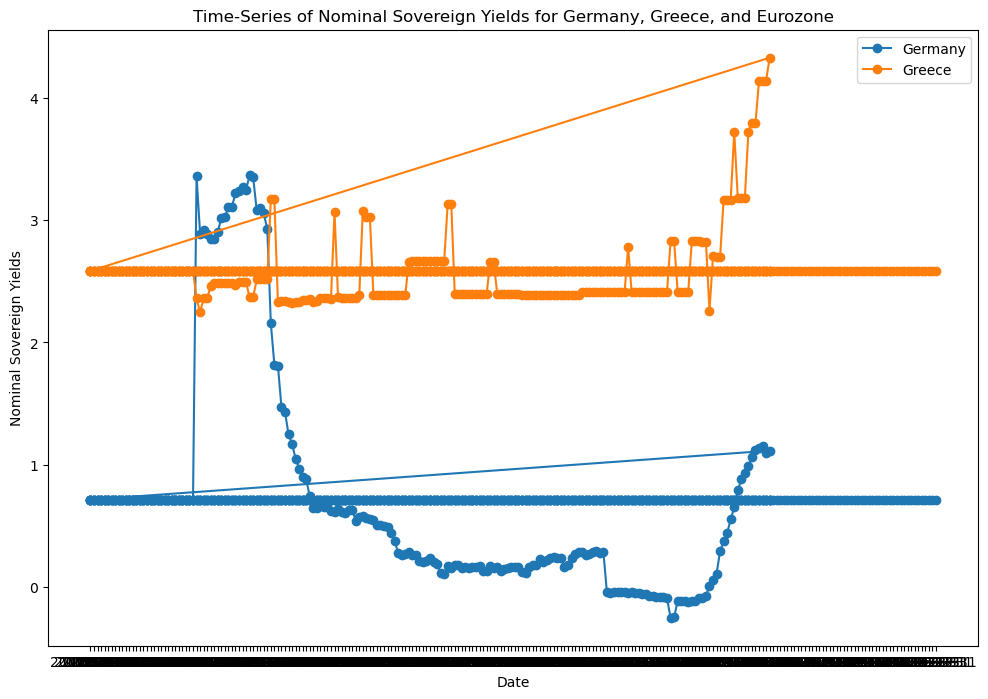

In [21]:
# Plotting
plt.figure(figsize=(12, 8))
plt.plot(df['date'], df['Germany_Yield'], label='Germany', linestyle='-', marker='o')
plt.plot(df['date'], df['Greece_Yield'], label='Greece', linestyle='-', marker='o')
 
# Add labels and legend
plt.xlabel('Date')
plt.ylabel('Nominal Sovereign Yields')
plt.legend()
plt.title('Time-Series of Nominal Sovereign Yields for Germany, Greece, and Eurozone')

plt.legend()

# Show the plot
plt.show()


 ## 5. Plot the time-series of debt to GDP for Germany and Greece, and for the whole Eurozone, in one plot.


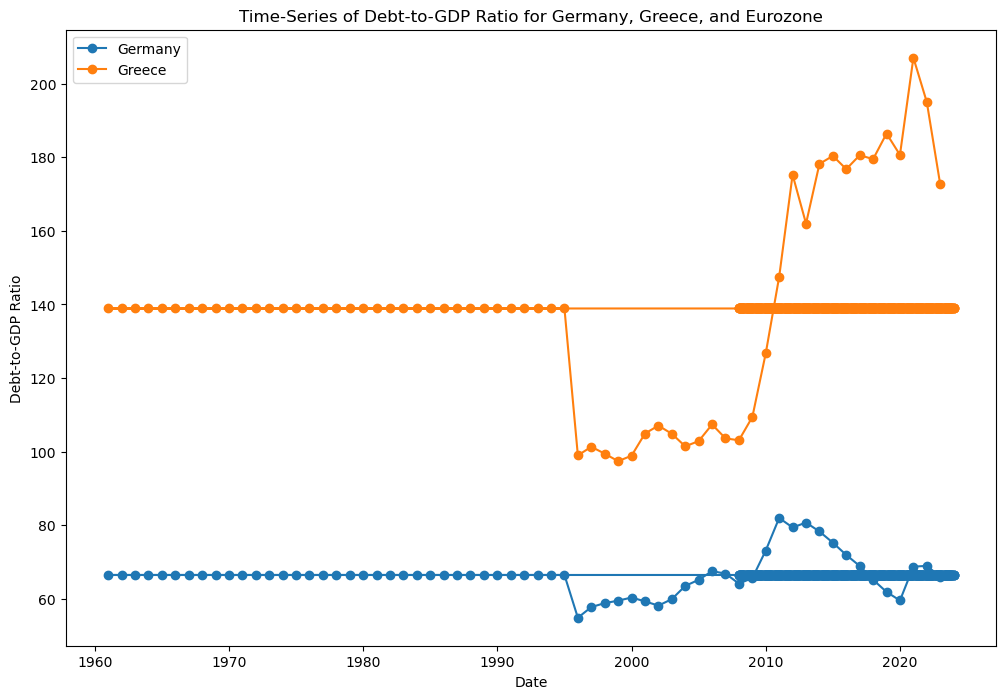

In [26]:
# Convert the 'date' column to datetime  
df['date'] = pd.to_datetime(df['date'])

# Plotting
plt.figure(figsize=(12, 8))
plt.plot(df['date'], df['Germany_Debt_GDP'], label='Germany', linestyle='-', marker='o')
plt.plot(df['date'], df['Greece_Debt_GDP'], label='Greece', linestyle='-', marker='o')
 
# Add labels and legend
plt.xlabel('Date')
plt.ylabel('Debt-to-GDP Ratio')
plt.legend()
plt.title('Time-Series of Debt-to-GDP Ratio for Germany, Greece, and Eurozone')

# Show the plot
plt.show()